# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
from pprint import pprint
import matplotlib.colors as mcolors

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set up Splinter 
path= {'executable_path':ChromeDriverManager().install()}
browser = Browser('chrome', ** path, headless= False)

# browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html = browser.html


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = soup(html, 'html.parser')

In [5]:
# Find the table - use class table. 
table = soup.find('table', class_='table')
table_rows= soup.find_all('tr', class_="data-row")

# pprint(table)
# pprint(table_rows)


# header = table.find_all('th')
# pprint(header)


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Store the table data from above- using table_rows created 
mars_temp = []

# Loop through the table_rows data to get td values .
for row in table_rows:
    data = row.find_all('td')
    row =[col.text for col in data]
    mars_temp.append(row)
    
# print(mars_temp)


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [7]:
#Create DF Headers
# Store header data from above table object
header = table.find_all('th')

# Extract the text content from each item in the 'header' list using list comprehension
header_text_list = [item.text.strip() for item in header]

# The 'header_text_list' will contain only the text content of each header item
header_text_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_temp, columns = header_text_list)


In [9]:
# Confirm DataFrame was created successfully
mars_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mars_temp_df= mars_df.astype({"sol": int, "ls": int, "month": int, "min_temp": float, "pressure": float})
#datetime type
mars_temp_df["terrestrial_date"]= pd.to_datetime(mars_df["terrestrial_date"])


In [12]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
month_counts = mars_temp_df["month"].value_counts().sort_index()
print(f"there are {month_counts} months on Mars")

there are 1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64 months on Mars


In [15]:
# 2. How many Martian days' worth of data are there?
mars_day = (len(mars_temp_df["sol"].unique()))
print(f" There are approximately {mars_day} martian days worth of data in this set")


 There are approximately 1867 martian days worth of data in this set


In [16]:
# 3. What is the average low temperature by month?

# Calculate the average minimum temperature for each month
average_min_temp_by_month = mars_temp_df.groupby("month")["min_temp"].mean()

print(average_min_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

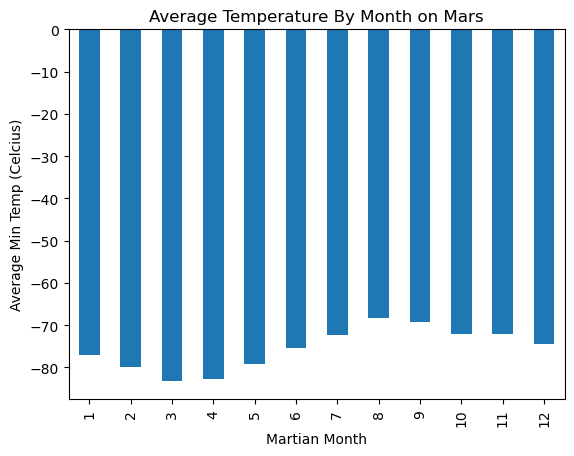

In [17]:
# Plot the average temperature by month
average_min_temp_by_month.plot(kind="bar")
plt.ylabel("Average Min Temp (Celcius)")
plt.title("Average Temperature By Month on Mars")
plt.xlabel("Martian Month")
plt.show

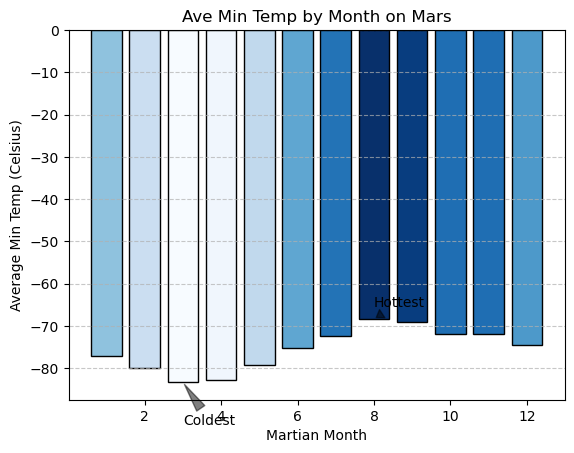

The coldest month is month 3, with an average minimum temperature of -83.31 Celsius.
The hottest month is month 8, with an average minimum temperature of -68.38 Celsius.


In [19]:
# Identify the coldest and hottest months in Curiosity's location

# Calculate the average minimum temperature for each month and sort by temperature
ranked_av_min = mars_temp_df.groupby("month")["min_temp"].mean().sort_values()

# Define a color map (dark blue to light blue)
cmap = plt.get_cmap('Blues')

# Normalize the data to scale the color from min to max temperature
normalize = mcolors.Normalize(vmin=ranked_av_min.min(), vmax=ranked_av_min.max())

# Create a bar plot with scaled color
plt.bar(ranked_av_min.index, ranked_av_min.values,
        color=cmap(normalize(ranked_av_min.values)), edgecolor='black')
plt.ylabel("Average Min Temp (Celsius)")
plt.xlabel("Martian Month")
plt.title("Ave Min Temp by Month on Mars")

# Get the coldest and hottest months
coldest_month = ranked_av_min.idxmin()
coldest_temp = ranked_av_min.loc[coldest_month]
hottest_month = ranked_av_min.idxmax()
hottest_temp = ranked_av_min.loc[hottest_month]

# Add annotations for coldest and hottest months
plt.annotate("Coldest", xy=(coldest_month, ranked_av_min.min()), xytext=(coldest_month, ranked_av_min.min() - 10),
             arrowprops=dict(facecolor='black', arrowstyle="wedge,tail_width=0.7", alpha=0.5))
plt.annotate("Hottest", xy=(hottest_month, ranked_av_min.max()), xytext=(hottest_month, ranked_av_min.max() + 3),
             arrowprops=dict(facecolor='black', arrowstyle="wedge,tail_width=0.7", alpha=0.5))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"The coldest month is month {coldest_month}, with an average minimum temperature of {coldest_temp:.2f} Celsius.")
print(f"The hottest month is month {hottest_month}, with an average minimum temperature of {hottest_temp:.2f} Celsius.")


In [20]:
# 4. Average pressure by Martian month
average_pressure_by_month = mars_temp_df.groupby("month")["pressure"].mean()
print(average_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


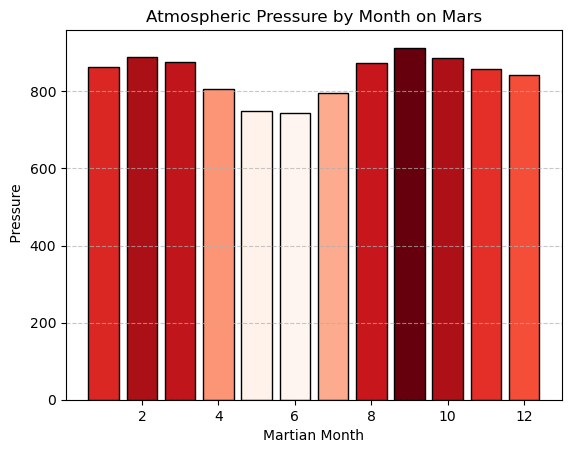

The Highest Atmospheric Pressure month is month 6, with an average minimum temperature of 745.05
The Lowest Atmospheric Pressure month is month 9, with an average minimum temperature of 913.31


In [21]:
# Plot the average pressure by month

# Calculate the average minimum temperature for each month and sort by temperature
# Define a color map (dark blue to light blue)
cmap = plt.get_cmap('Reds')

# Normalize the data to scale the color from min to max temperature
normalize = mcolors.Normalize(vmin=average_pressure_by_month.min(), vmax=average_pressure_by_month.max())


hp_month = average_pressure_by_month.idxmin()
hp_pressure = average_pressure_by_month.loc[hp_month]
lp_month = average_pressure_by_month.idxmax()
lp_pressure = average_pressure_by_month.loc[lp_month]


# Create a bar plot with scaled color
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values,
        color=cmap(normalize(average_pressure_by_month.values)), edgecolor='black')
plt.ylabel(" Pressure")
plt.xlabel("Martian Month")
plt.title("Atmospheric Pressure by Month on Mars")



plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"The Highest Atmospheric Pressure month is month {hp_month}, with an average minimum temperature of {hp_pressure:.2f}")
print(f"The Lowest Atmospheric Pressure month is month {lp_month}, with an average minimum temperature of {lp_pressure:.2f}")


<function matplotlib.pyplot.show(close=None, block=None)>

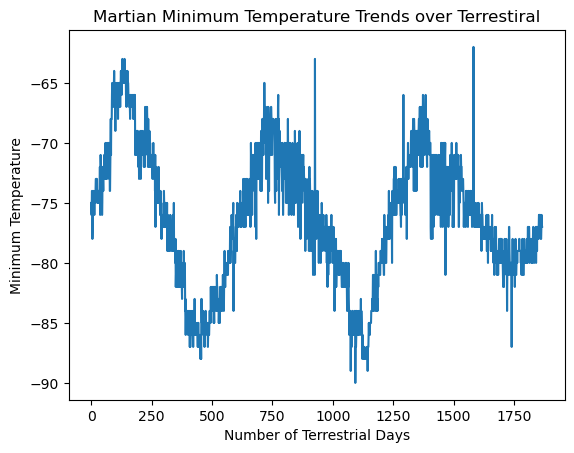

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?

mars_temp_df["min_temp"].plot(kind="line")
plt.ylabel("Minimum Temperature")
plt.xlabel("Number of Terrestrial Days")
plt.title("Martian Minimum Temperature Trends over Terrestiral")
plt.show

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
mars_temp_df.to_csv('mars_temp_df.csv')

In [24]:
browser.quit()